# Data Cleaning & Analysis

### 💎 Dataset
- UNSW-NB15 is downloaded at: https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15/data
<hr width=70% style="float: left">

<div class="alert alert-block alert-warning">
<h4>👨🏽‍💻👩🏻‍💻 <b>0. Set Up</b></h4>
</div>

In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-block alert-warning">
<h4>👨🏽‍💻👩🏻‍💻 <b>1. Data Cleaning</b></h4>

* Concat all the *.csv* file
* `fillna` is used to tackle *NAN* problem
* Drop irrelevant features and duplicates
</div>

In [ ]:
dfs = []
for i in range(1,5):
    path = './Detect_Data/UNSW-NB15_{}.csv' 
    dfs.append(pd.read_csv(path.format(i), header = None))
    
# Concat all to a single df
combined_data = pd.concat(dfs).reset_index(drop=True)  

In [4]:
combined_data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [5]:
dataset_columns = pd.read_csv('./Detect_Data/NUSW-NB15_features.csv',encoding='ISO-8859-1')
dataset_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          49 non-null     int64 
 1   Name         49 non-null     object
 2   Type         49 non-null     object
 3   Description  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [8]:
combined_data.columns = dataset_columns['Name']
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [9]:
combined_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [10]:
combined_data['attack_cat'].value_counts()

attack_cat
Generic             215481
Exploits             44525
 Fuzzers             19195
DoS                  16353
 Reconnaissance      12228
 Fuzzers              5051
Analysis              2677
Backdoor              1795
Reconnaissance        1759
 Shellcode            1288
Backdoors              534
Shellcode              223
Worms                  174
Name: count, dtype: int64

In [11]:
# Data Cleaning
combined_data['attack_cat'] = combined_data['attack_cat'].fillna(value='normal').apply(lambda x: x.strip().lower())
combined_data['attack_cat'] = combined_data['attack_cat'].replace('backdoors','backdoor', regex=True).apply(lambda x: x.strip().lower())
combined_data['attack_cat'].value_counts()

attack_cat
normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: count, dtype: int64

In [18]:
combined_data['ct_flw_http_mthd'] = combined_data['ct_flw_http_mthd'].fillna(value=0)
combined_data['is_ftp_login'] = combined_data['is_ftp_login'].fillna(value=0)
combined_data['is_ftp_login'] = np.where(combined_data['is_ftp_login']>1, 1, combined_data['is_ftp_login'])
combined_data['service'] = combined_data['service'].apply(lambda x:"None" if x=='-' else x)
combined_data['ct_ftp_cmd'] = combined_data['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

In [22]:
combined_data.shape

(2540047, 49)

In [23]:
# In reality, params like srcip is random
combined_data.drop(columns=['srcip','sport','dstip','dsport','Label'],inplace=True)

In [24]:
# Save Cleaned Data
combined_data.to_csv('./Detect_Data/cleaned.csv',index=False)

<div class="alert alert-block alert-warning">
<h4>👨🏽‍💻👩🏻‍💻 <b>2. Data Analysis</b></h4>
</div>

In [2]:
data_clean=pd.read_csv('./Detect_Data/cleaned.csv')
data_clean.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,udp,CON,0.001055,132,164,31,29,0,0,dns,...,0.0,0,3,7,1,3,1,1,1,normal
1,udp,CON,0.036133,528,304,31,29,0,0,NaN,...,0.0,0,2,4,2,3,1,1,2,normal
2,udp,CON,0.001119,146,178,31,29,0,0,dns,...,0.0,0,12,8,1,2,2,1,1,normal
3,udp,CON,0.001209,132,164,31,29,0,0,dns,...,0.0,0,6,9,1,1,1,1,1,normal
4,udp,CON,0.001169,146,178,31,29,0,0,dns,...,0.0,0,7,9,1,1,1,1,1,normal


In [3]:
numeric_columns = data_clean.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm'],
      dtype='object')

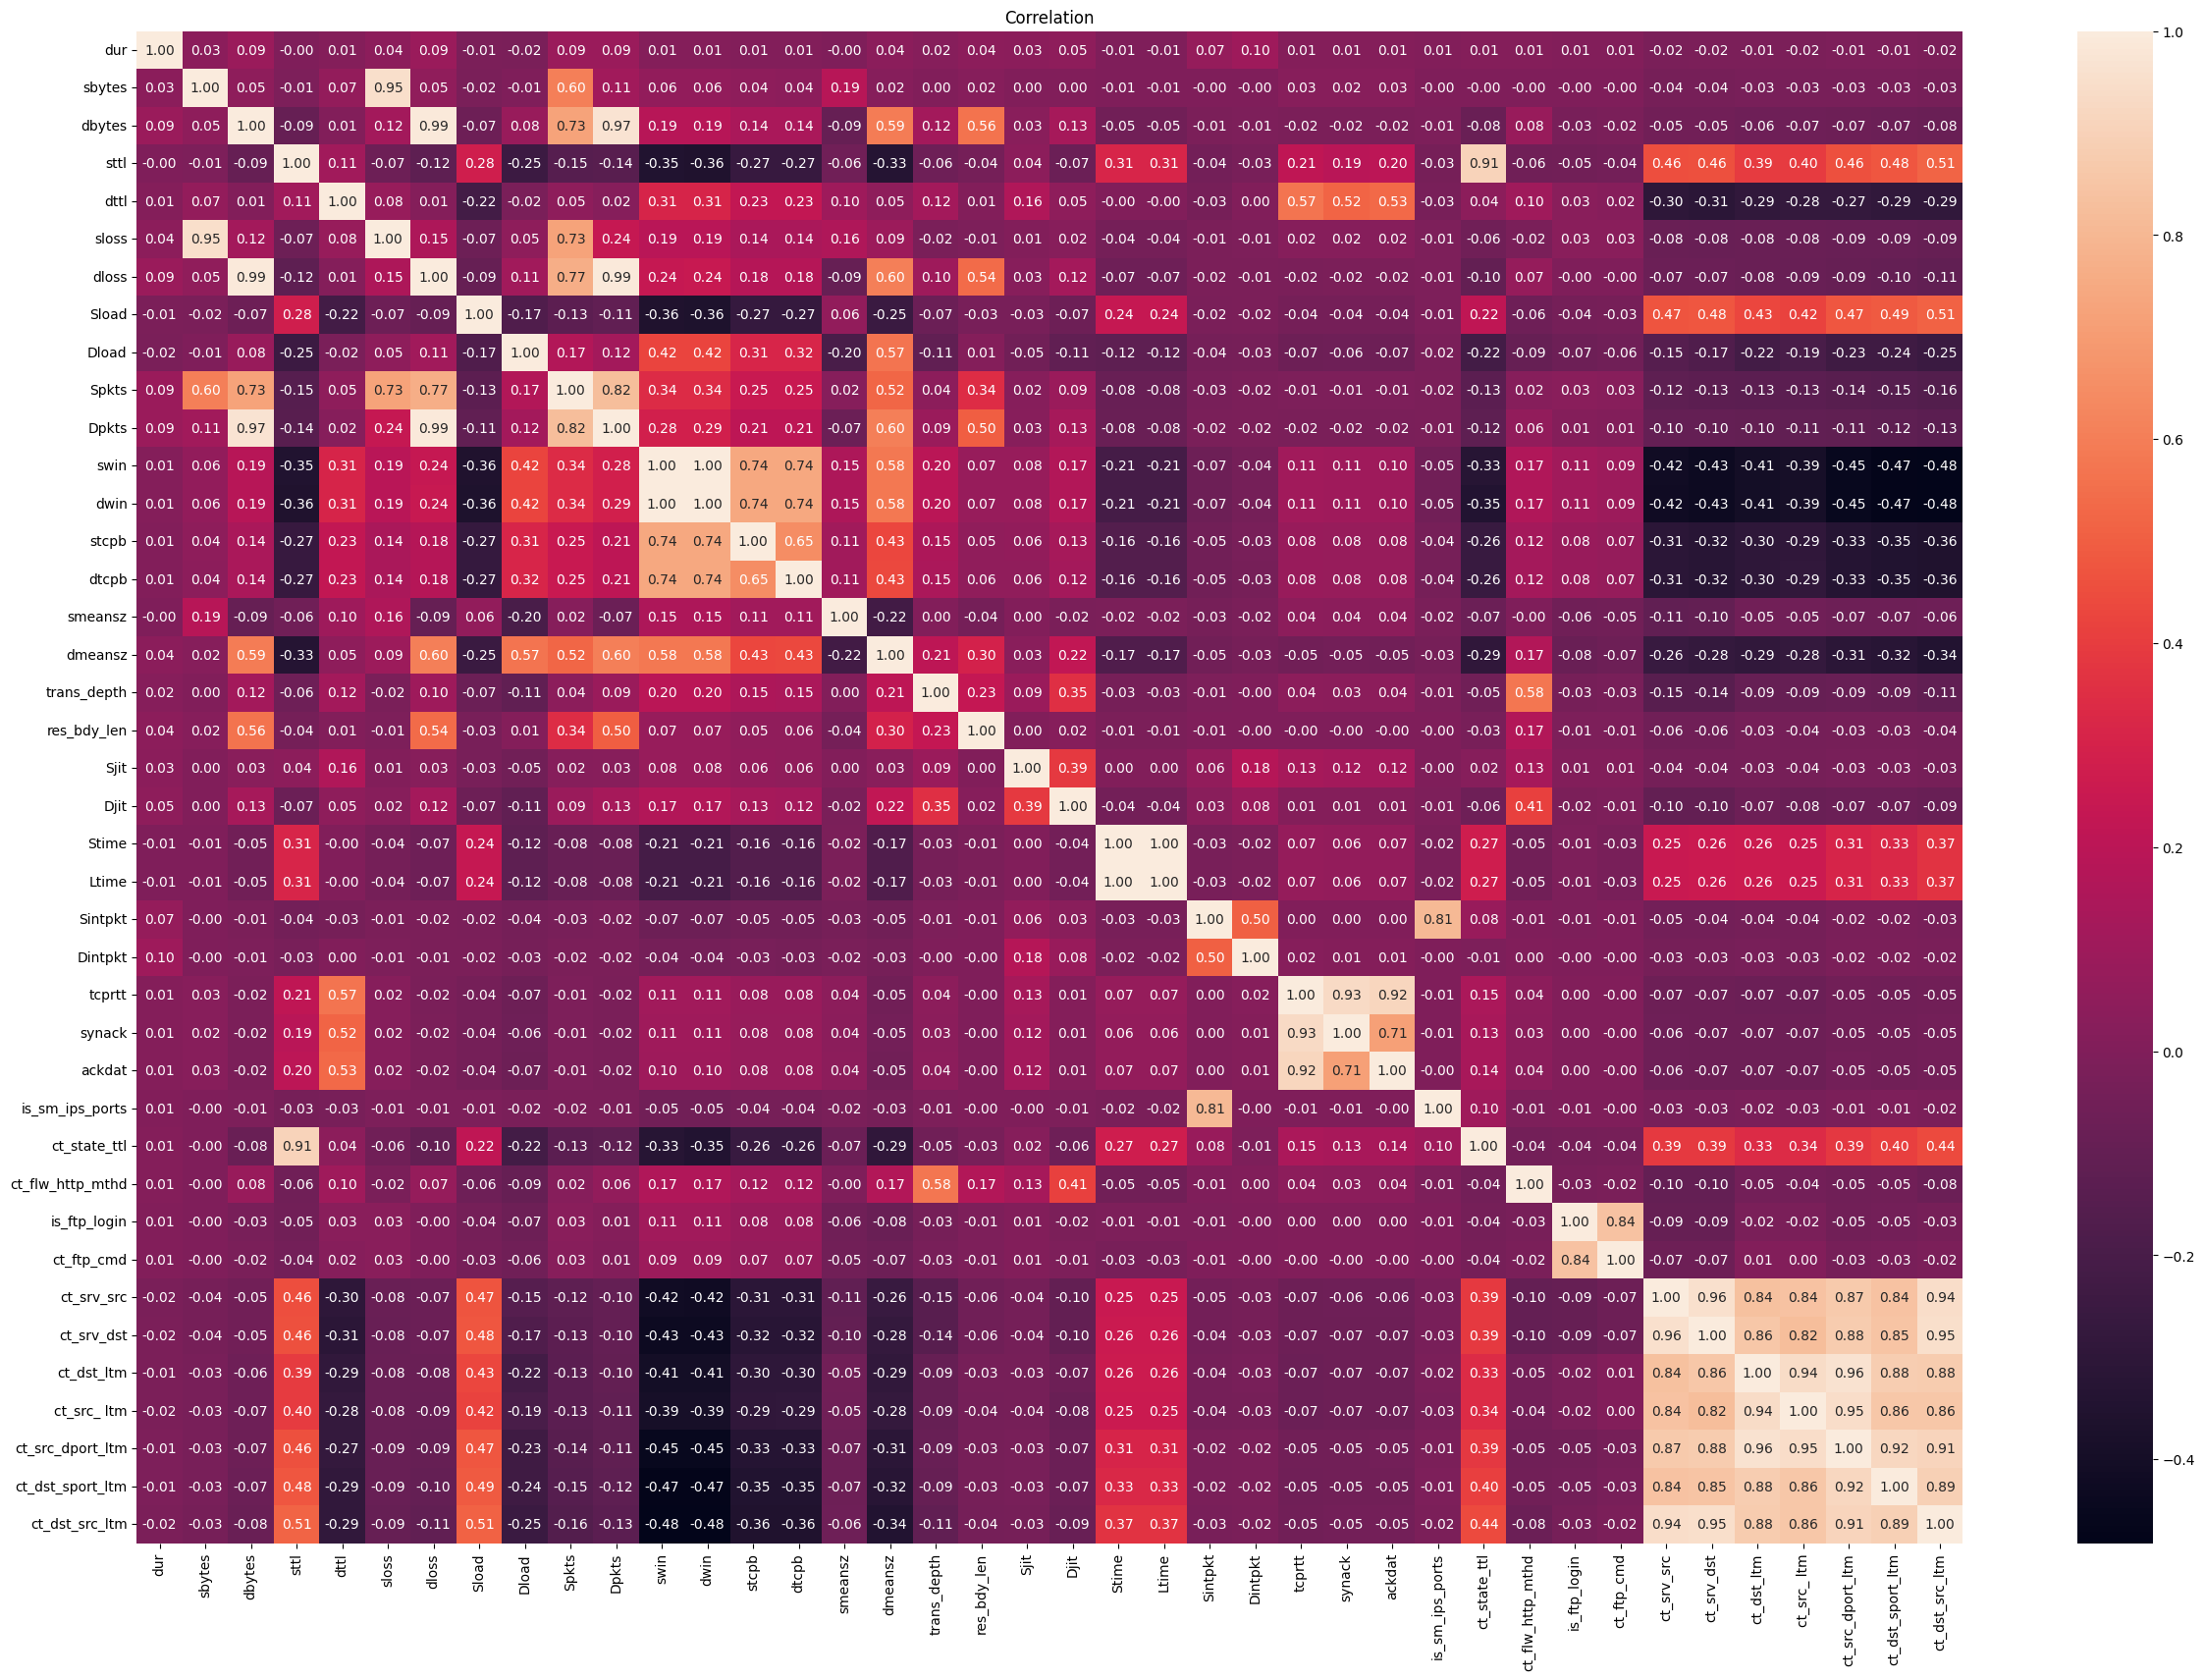

In [4]:
correlation_matrix = data_clean[numeric_columns].corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation')
plt.show()

In [6]:
data_clean['attack_cat'].value_counts()

attack_cat
normal            2218764
generic            215481
exploits            44525
fuzzers             24246
dos                 16353
reconnaissance      13987
analysis             2677
backdoor             2329
shellcode            1511
worms                 174
Name: count, dtype: int64

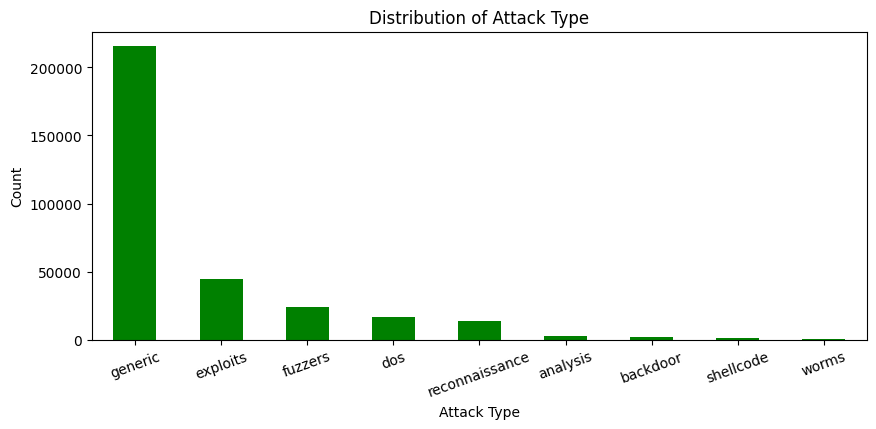

In [26]:
attack_cat_distribution = data_clean['attack_cat'].value_counts()
plt.figure(figsize=(10,4))
attack_cat_distribution[1:].plot(kind='bar',color='green')
plt.title('Distribution of Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=20)
#plt.grid()
plt.show()